## Geoanalytics

In [21]:
import pandas
import difflib
from datetime import datetime
import numpy as np
import geopandas
import folium
import dateutil
from folium.plugins import TimeSliderChoropleth

### Read data

In [22]:
customer_metadata = pandas.read_feather('data/real_customer_metadata_openslava.ftr')
# customer_metadata = pandas.read_feather('data/synth_customer_metadata_openslava.ftr')
customer_metadata

,ID,GENDER,AGE_YEARS,CITY_ADDRESS,VL_CURR_BALANCE,VL_INCOME,VL_TXN_ALL,CNT_CARDS,CNT_TXN,CNT_TXN_3M,...,VL_TXN_ALL_3M,VL_INCOME_3M,CNT_TXN_6M,VL_CURR_BALANCE_6M,VL_TXN_ALL_6M,VL_INCOME_6M,CNT_TXN_12M,VL_CURR_BALANCE_12M,VL_TXN_ALL_12M,VL_INCOME_12M
0,0,Z,36,KOKO�OVCE,50.222303,693.746527,1101.863217,1,49,187,...,3991.916778,821.496203,349,209.530127,5256.634686,459.669001,526,285.537782,4857.087764,368.420444
1,1,M,37,�eliezovce,3272.182043,603.338468,1933.020774,1,71,276,...,5882.820241,699.760746,532,10983.512225,9761.311986,660.627658,1000,4437.122049,26977.878304,844.665598
2,2,M,38,Valask�,251.077397,1089.189969,4412.805085,3,54,205,...,12843.398024,2468.829781,452,631.628611,29684.432750,6117.830267,903,1342.677849,86890.219891,4979.878802
3,3,Z,40,�UBIETOV�,721.664764,956.666612,8769.264459,1,30,75,...,32703.810439,1842.631744,181,5128.437088,83456.996723,2194.310037,338,8165.983159,117262.013058,1246.133744
4,4,Z,36,BRATISLAVA 2,4917.645129,3287.969386,1325.102954,1,61,320,...,9119.180429,2680.409733,681,3245.325667,15541.714057,2237.891545,1187,2880.077570,28834.415230,2274.385155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,4107,M,38,Pie��any,317.678402,1296.952529,1368.140342,1,28,84,...,5111.871682,727.852027,165,742.928493,10186.857957,1055.398025,299,1192.931231,16027.355711,1096.419133
4108,4108,M,42,Bratislava-Star� Mesto,181624.711260,2948.072930,9352.561840,1,41,177,...,40906.667241,3019.478303,293,207208.094390,64457.534165,2543.535088,679,102277.440009,102017.075330,4141.477298
4109,4109,M,29,Rozhanovce,571.447861,867.967067,2847.005412,1,51,144,...,8563.885370,554.081132,340,295.002274,12269.452545,732.553871,614,454.413538,30063.790668,581.795869
4110,4110,M,31,BRATISLAVA 42,0.245639,1605.500465,179.812262,1,27,124,...,1115.425185,956.812511,283,1.494170,2324.141337,913.177584,583,12.426057,5704.962795,986.876438


In [23]:
trans = pandas.read_feather('data/real_transactions_openslava.ftr')
# trans = pandas.read_feather('data/synth_transactions_openslava.ftr')
trans

,ID,DT_TXN,VL_TXN,CURRENCY
0,0,2021-05-26,8.951807,EUR
1,0,2021-11-17,3.809996,EUR
2,0,2021-11-30,7.622064,EUR
3,0,2021-05-30,6.128364,EUR
4,0,2021-01-12,3.531057,EUR
...,...,...,...,...
4152671,4111,2021-11-06,5.827263,EUR
4152672,4111,2021-05-14,20.166832,EUR
4152673,4111,2021-05-15,23.538863,EUR
4152674,4111,2021-03-12,110.507989,EUR


In [24]:
# code list of municipalities, filter empty values and create a list
# There is geolocation of municipalities (latitude and longitude) and also reference number for district.
districts = pandas.read_excel('data/districts.xlsx')
districts = districts[districts['ref'].notnull()]
list_municipality = districts['municipality'].to_list()
districts

,municipality,lat,lon,district,ref,region
0,ABELOVA,48.41179,19.43460,606.0,SK0326,Banskobystrický kraj
1,ABOVCE,48.32291,20.34604,609.0,SK0329,Banskobystrický kraj
2,ABRAHAM,48.24642,17.61967,202.0,SK0212,Trnavský kraj
3,ABRAHAMOVCE,49.16146,21.34378,701.0,SK0411,Prešovský kraj
4,ABRAMOVA,48.93542,18.79531,509.0,SK0319,Žilinský kraj
...,...,...,...,...,...,...
2784,ZUPCANY,49.00537,21.16776,707.0,SK0417,Prešovský kraj
2785,ZUPKOV,48.52230,18.63092,612.0,SK032C,Banskobystrický kraj
2786,ZVOLEN,48.57386,19.12771,611.0,SK032B,Banskobystrický kraj
2787,ZVOLENSKA SLATINA,48.56000,19.25882,611.0,SK032B,Banskobystrický kraj


### Preprocessing data - cleaning

In [25]:
# We want to clean the data and, if possible, match the CITY_ADRESS with the municipality list.

difflib.get_close_matches('LEDNICK� ROVNE - HORENICK', list_municipality, n=1, cutoff=0.6)
# ?difflib.get_close_matches

['LEDNICKE ROVNE']

In [26]:
def get_close_matches(address):
    match = difflib.get_close_matches(str(address).upper(), list_municipality, n=1, cutoff=0.6)
    if (len(match) == 1):
        return match[0]
    else:
        return 'N/A'
    

customer_metadata['CITY_ADRESS_MATCH'] = customer_metadata['CITY_ADDRESS'].map(lambda a: get_close_matches(a))
customer_metadata

,ID,GENDER,AGE_YEARS,CITY_ADDRESS,VL_CURR_BALANCE,VL_INCOME,VL_TXN_ALL,CNT_CARDS,CNT_TXN,CNT_TXN_3M,...,VL_INCOME_3M,CNT_TXN_6M,VL_CURR_BALANCE_6M,VL_TXN_ALL_6M,VL_INCOME_6M,CNT_TXN_12M,VL_CURR_BALANCE_12M,VL_TXN_ALL_12M,VL_INCOME_12M,CITY_ADRESS_MATCH
0,0,Z,36,KOKO�OVCE,50.222303,693.746527,1101.863217,1,49,187,...,821.496203,349,209.530127,5256.634686,459.669001,526,285.537782,4857.087764,368.420444,KOKOSOVCE
1,1,M,37,�eliezovce,3272.182043,603.338468,1933.020774,1,71,276,...,699.760746,532,10983.512225,9761.311986,660.627658,1000,4437.122049,26977.878304,844.665598,ZELIEZOVCE
2,2,M,38,Valask�,251.077397,1089.189969,4412.805085,3,54,205,...,2468.829781,452,631.628611,29684.432750,6117.830267,903,1342.677849,86890.219891,4979.878802,VALASKA
3,3,Z,40,�UBIETOV�,721.664764,956.666612,8769.264459,1,30,75,...,1842.631744,181,5128.437088,83456.996723,2194.310037,338,8165.983159,117262.013058,1246.133744,LUBIETOVA
4,4,Z,36,BRATISLAVA 2,4917.645129,3287.969386,1325.102954,1,61,320,...,2680.409733,681,3245.325667,15541.714057,2237.891545,1187,2880.077570,28834.415230,2274.385155,BRATISLAVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,4107,M,38,Pie��any,317.678402,1296.952529,1368.140342,1,28,84,...,727.852027,165,742.928493,10186.857957,1055.398025,299,1192.931231,16027.355711,1096.419133,PIESTANY
4108,4108,M,42,Bratislava-Star� Mesto,181624.711260,2948.072930,9352.561840,1,41,177,...,3019.478303,293,207208.094390,64457.534165,2543.535088,679,102277.440009,102017.075330,4141.477298,BRATISLAVA
4109,4109,M,29,Rozhanovce,571.447861,867.967067,2847.005412,1,51,144,...,554.081132,340,295.002274,12269.452545,732.553871,614,454.413538,30063.790668,581.795869,ROZHANOVCE
4110,4110,M,31,BRATISLAVA 42,0.245639,1605.500465,179.812262,1,27,124,...,956.812511,283,1.494170,2324.141337,913.177584,583,12.426057,5704.962795,986.876438,BRATISLAVA


In [27]:
customer_metadata[customer_metadata['CITY_ADRESS_MATCH'] == 'N/A']

,ID,GENDER,AGE_YEARS,CITY_ADDRESS,VL_CURR_BALANCE,VL_INCOME,VL_TXN_ALL,CNT_CARDS,CNT_TXN,CNT_TXN_3M,...,VL_INCOME_3M,CNT_TXN_6M,VL_CURR_BALANCE_6M,VL_TXN_ALL_6M,VL_INCOME_6M,CNT_TXN_12M,VL_CURR_BALANCE_12M,VL_TXN_ALL_12M,VL_INCOME_12M,CITY_ADRESS_MATCH


### Join data

In [28]:
trans_cust = pandas.merge(trans, customer_metadata[['ID', 'CITY_ADRESS_MATCH']], how='left', left_on='ID', right_on='ID')
trans_cust_districts = pandas.merge(trans_cust, districts[['municipality', 'ref', 'lat', 'lon']], how='left', left_on='CITY_ADRESS_MATCH', right_on='municipality')
trans_cust_districts.reset_index(inplace=True, drop=True)
trans_cust_districts

,ID,DT_TXN,VL_TXN,CURRENCY,CITY_ADRESS_MATCH,municipality,ref,lat,lon
0,0,2021-05-26,8.951807,EUR,KOKOSOVCE,KOKOSOVCE,SK0417,48.94471,21.34043
1,0,2021-11-17,3.809996,EUR,KOKOSOVCE,KOKOSOVCE,SK0417,48.94471,21.34043
2,0,2021-11-30,7.622064,EUR,KOKOSOVCE,KOKOSOVCE,SK0417,48.94471,21.34043
3,0,2021-05-30,6.128364,EUR,KOKOSOVCE,KOKOSOVCE,SK0417,48.94471,21.34043
4,0,2021-01-12,3.531057,EUR,KOKOSOVCE,KOKOSOVCE,SK0417,48.94471,21.34043
...,...,...,...,...,...,...,...,...,...
4152671,4111,2021-11-06,5.827263,EUR,ZVOLEN,ZVOLEN,SK032B,48.57386,19.12771
4152672,4111,2021-05-14,20.166832,EUR,ZVOLEN,ZVOLEN,SK032B,48.57386,19.12771
4152673,4111,2021-05-15,23.538863,EUR,ZVOLEN,ZVOLEN,SK032B,48.57386,19.12771
4152674,4111,2021-03-12,110.507989,EUR,ZVOLEN,ZVOLEN,SK032B,48.57386,19.12771


### Aggregations - maximum and group-by

In [29]:
max_trans = trans_cust_districts.nlargest(10, 'VL_TXN')
max_trans_dict = max_trans[['VL_TXN', 'municipality', 'lon', 'lat']].to_dict('records')
max_trans

,ID,DT_TXN,VL_TXN,CURRENCY,CITY_ADRESS_MATCH,municipality,ref,lat,lon
474248,466,2021-05-24,33364.751262,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
473876,466,2021-03-02,27831.683171,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
225075,221,2021-02-02,23116.897804,EUR,KOSICE,KOSICE,SK0422,48.71395,21.25808
1925124,1897,2021-10-22,21404.872474,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
2364274,2330,2021-07-22,18352.100876,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
1471636,1453,2021-10-23,18187.869561,EUR,TOPOLCANY,TOPOLCANY,SK0236,48.55901,18.16980
1926016,1897,2021-09-09,17809.753827,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
213781,211,2021-07-26,17733.746865,EUR,PRESOV,PRESOV,SK0417,48.99836,21.20334
474738,466,2021-12-20,16582.757523,EUR,BRATISLAVA,BRATISLAVA,SK0101,48.14816,17.10674
2510181,2472,2021-07-16,15990.908058,EUR,NITRA,NITRA,SK0233,48.29635,18.08084


In [30]:
districts_txn_agg = trans_cust_districts.groupby(['ref'])['VL_TXN'].agg(['sum', 'count', 'mean']).reset_index()
districts_txn_agg

,ref,sum,count,mean
0,SK0101,2.257876e+07,1075377,20.996134
1,SK0106,9.547732e+05,58358,16.360622
2,SK0107,1.154011e+06,57494,20.071850
3,SK0108,2.598368e+06,127058,20.450247
4,SK0211,1.356469e+06,65880,20.589997
...,...,...,...,...
67,SK0427,1.945649e+06,85596,22.730611
68,SK0428,5.966697e+05,24549,24.305254
69,SK0429,6.172358e+04,6180,9.987634
70,SK042A,5.064037e+05,30091,16.829077


In [31]:
districts_unique_id_agg = trans_cust_districts.groupby(['ref'])['ID'].agg(['nunique']).reset_index()
districts_unique_id_agg

,ref,nunique
0,SK0101,1065
1,SK0106,62
2,SK0107,63
3,SK0108,126
4,SK0211,65
...,...,...
67,SK0427,87
68,SK0428,24
69,SK0429,6
70,SK042A,31


In [32]:
districts_agg = pandas.concat([districts_txn_agg, districts_unique_id_agg['nunique']], axis=1).reset_index()
districts_agg

,index,ref,sum,count,mean,nunique
0,0,SK0101,2.257876e+07,1075377,20.996134,1065
1,1,SK0106,9.547732e+05,58358,16.360622,62
2,2,SK0107,1.154011e+06,57494,20.071850,63
3,3,SK0108,2.598368e+06,127058,20.450247,126
4,4,SK0211,1.356469e+06,65880,20.589997,65
...,...,...,...,...,...,...
67,67,SK0427,1.945649e+06,85596,22.730611,87
68,68,SK0428,5.966697e+05,24549,24.305254,24
69,69,SK0429,6.172358e+04,6180,9.987634,6
70,70,SK042A,5.064037e+05,30091,16.829077,31


### Geovisualization - Choropleth

,Okres,REF,geometry
0,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556..."
1,Banská Štiavnica,SK0322,"POLYGON ((18.75064 48.41116, 18.75472 48.41284..."
2,Bardejov,SK0411,"POLYGON ((20.98654 49.30662, 20.99414 49.31268..."
3,Bratislava,SK0101,"POLYGON ((17.22444 48.19175, 17.22513 48.18639..."
4,Brezno,SK0323,"POLYGON ((19.35043 48.89758, 19.35652 48.90367..."
...,...,...,...
67,Čadca,SK0312,"POLYGON ((18.32260 49.31511, 18.32860 49.31863..."
68,Šaľa,SK0235,"POLYGON ((17.75949 48.14599, 17.75477 48.14833..."
69,Žarnovica,SK032C,"POLYGON ((18.47867 48.54860, 18.48734 48.54930..."
70,Žiar nad Hronom,SK032D,"POLYGON ((18.64541 48.63321, 18.65650 48.63992..."


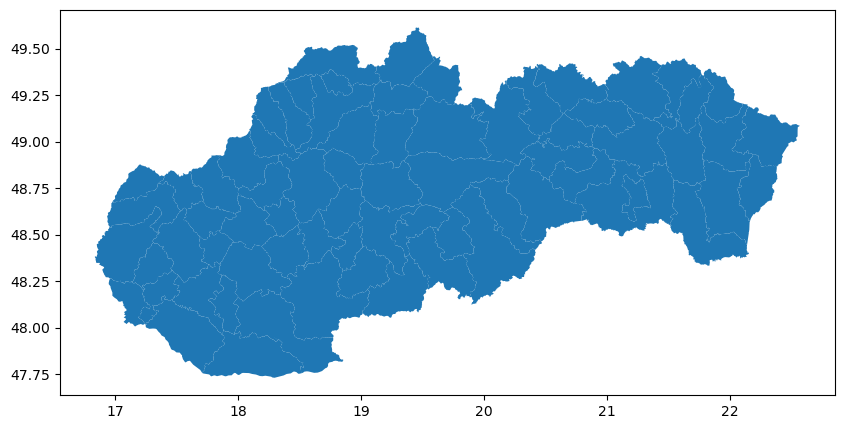

In [33]:
districts_shp = geopandas.read_file('data/districts.shp', encoding = 'utf8')
districts_shp = geopandas.GeoDataFrame(districts_shp, geometry='geometry')
districts_shp['geometry'] = districts_shp['geometry'].simplify(tolerance=0.001, preserve_topology=True)
districts_shp.crs = 'epsg:4326'
districts_shp.plot(figsize=(10,10))
districts_shp

In [34]:
districts_shp_agg = pandas.merge(districts_shp, districts_agg, how='outer', left_on='REF', right_on='ref')
districts_shp_agg.drop(columns={'ref'}, inplace=True)
districts_shp_agg.crs = 'epsg:4326'

# Bratislava district ingests most of the data (remove it from the dataset)
# districts_shp_agg = districts_shp_agg[districts_shp_agg["Okres"] != "Bratislava"]

districts_shp_agg.fillna(0, inplace=True)
districts_shp_agg.reset_index(inplace=True, drop=True)
districts_shp_agg

,Okres,REF,geometry,index,sum,count,mean,nunique
0,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",38,1.532525e+06,74349,20.612585,75
1,Banská Štiavnica,SK0322,"POLYGON ((18.75064 48.41116, 18.75472 48.41284...",39,4.026426e+05,24437,16.476761,25
2,Bardejov,SK0411,"POLYGON ((20.98654 49.30662, 20.99414 49.31268...",51,8.581295e+05,35947,23.872075,36
3,Brezno,SK0323,"POLYGON ((19.35043 48.89758, 19.35652 48.90367...",40,3.183712e+05,20428,15.585040,19
4,Bytča,SK0311,"POLYGON ((18.37340 49.31898, 18.37890 49.32373...",27,3.046746e+05,15128,20.139779,16
...,...,...,...,...,...,...,...,...
66,Čadca,SK0312,"POLYGON ((18.32260 49.31511, 18.32860 49.31863...",28,6.349705e+05,35276,18.000071,37
67,Šaľa,SK0235,"POLYGON ((17.75949 48.14599, 17.75477 48.14833...",24,1.696343e+05,5915,28.678670,6
68,Žarnovica,SK032C,"POLYGON ((18.47867 48.54860, 18.48734 48.54930...",49,2.404249e+05,17512,13.729154,18
69,Žiar nad Hronom,SK032D,"POLYGON ((18.64541 48.63321, 18.65650 48.63992...",50,1.939329e+05,9079,21.360596,9


In [35]:
m = folium.Map(location=[48.7,19.4], tiles='OpenStreetMap', zoom_start=8)

colormap_nunique = folium.LinearColormap(colors=['white', 'blue'], vmin=districts_shp_agg['nunique'].min(), vmax=districts_shp_agg['nunique'].max()).to_step(n=20)
colormap_nunique.caption = 'nunique'
colormap_nunique.add_to(m)

colormap_count = folium.LinearColormap(colors=['white', 'red'], vmin=districts_shp_agg['count'].min(), vmax=districts_shp_agg['count'].max()).to_step(n=40)
colormap_count.caption = 'count'
colormap_count.add_to(m)

for max_tran in max_trans_dict:
    folium.Marker(
        location=[max_tran['lat'], max_tran['lon']],
        popup='Max tran: ' + str(max_tran['VL_TXN']) + '\n' + 'Municipality: ' + str(max_tran['municipality']),
        icon=folium.Icon(color='red', icon='credit-card', prefix='fa'),
    ).add_to(m)

folium.GeoJson(
    districts_shp_agg,
    name='Transactions - count',
    style_function=lambda x: {'weight': 0.5, 'color': 'black','fillColor': colormap_count(x['properties']['count']), 'fillOpacity': 0.7},
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    smooth_factor=2.0,
    show=True,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Okres', 'sum', 'count', 'mean', 'nunique'],
        aliases=['County:', 'sum', 'count', 'mean', 'nunique'], 
        localize=True,
        labels=True, 
        sticky=True
    )
).add_to(m)

folium.GeoJson(
    districts_shp_agg,
    name='Transactions - unique number of clients',
    style_function=lambda x: {'weight': 0.5, 'color': 'black','fillColor': colormap_nunique(x['properties']['nunique']), 'fillOpacity': 0.7},
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    smooth_factor=2.0,
    show=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Okres', 'sum', 'count', 'mean', 'nunique'],
        aliases=['County:', 'sum', 'count', 'mean', 'nunique'], 
        localize=True,
        labels=True, 
        sticky=True
    )
).add_to(m)

folium.LayerControl(autoZIndex=True, collapsed=False, position='bottomright').add_to(m)
m.save(outfile='docs/geovis-chorepleth.html')

with open('data/geovis-chorepleth.geojson', 'w') as f:
    f.write(districts_shp_agg.to_json())

# m

### Geovisualization - TimeSlider Choropleth

In [36]:
# We want to see how data are distributed in time.
# We must aggregate data per date and district and join them with a geolocation.
districts_dt_agg = trans_cust_districts.groupby(['ref', 'DT_TXN'], dropna=False)['VL_TXN'].agg(['sum', 'count', 'mean']).reset_index()
districts_dt_agg

,ref,DT_TXN,sum,count,mean
0,SK0101,2021-01-01,47276.297755,2074,22.794743
1,SK0101,2021-01-02,45739.335118,2046,22.355491
2,SK0101,2021-01-03,42505.224688,2033,20.907636
3,SK0101,2021-01-04,39285.946614,2057,19.098661
4,SK0101,2021-01-05,39256.577601,1937,20.266690
...,...,...,...,...,...
26275,SK042B,2021-12-27,1531.276405,84,18.229481
26276,SK042B,2021-12-28,1754.515190,94,18.665055
26277,SK042B,2021-12-29,2276.349415,100,22.763494
26278,SK042B,2021-12-30,1779.751741,94,18.933529


In [37]:
districts_shp_date_agg = pandas.merge(districts_shp, districts_dt_agg, how='inner', left_on='REF', right_on='ref')
districts_shp_date_agg.drop(columns={'ref'}, inplace=True)
districts_shp_date_agg.crs = 'epsg:4326'

# Bratislava district ingests most of the data (remove it from the dataset)
# districts_shp_date_agg = districts_shp_date_agg[districts_shp_date_agg['Okres'] != 'Bratislava']

districts_shp_date_agg.reset_index(inplace=True, drop=True)
districts_shp_date_agg

,Okres,REF,geometry,DT_TXN,sum,count,mean
0,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",2021-01-01,3679.219041,155,23.736897
1,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",2021-01-02,2922.627543,135,21.649093
2,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",2021-01-03,4452.721817,175,25.444125
3,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",2021-01-04,3102.298828,166,18.688547
4,Banská Bystrica,SK0321,"POLYGON ((18.99112 48.80609, 18.99494 48.81556...",2021-01-05,3238.637057,153,21.167562
...,...,...,...,...,...,...,...
25910,Žilina,SK031B,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",2021-12-27,4654.542598,225,20.686856
25911,Žilina,SK031B,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",2021-12-28,4279.156190,220,19.450710
25912,Žilina,SK031B,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",2021-12-29,4192.816711,229,18.309243
25913,Žilina,SK031B,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",2021-12-30,3836.223114,199,19.277503


In [38]:
colormap = folium.LinearColormap(colors=['white','blue'], vmin=districts_shp_date_agg['count'].min(), vmax=districts_shp_date_agg['count'].max()).to_step(n=20)
colormap.caption = 'Count'

# For the TimerSlider Choropleth, it is necessary to create a styledict, which color is shown per district per time.
styledict = {}

for index, row in enumerate(districts_shp_agg.itertuples(), 0):
    tmp = {}
    for r in districts_shp_date_agg[districts_shp_date_agg['REF'] == row[2]].itertuples():
        tmp[str(r[4].timestamp())] = {
            'color': colormap(r[6]), 'opacity': 0.5
        }
    styledict[str(index)] = tmp

In [39]:
m = folium.Map(location=[48.7,19.4], tiles='OpenStreetMap', zoom_start=8)
g = TimeSliderChoropleth(
    districts_shp_agg.to_json(),
    styledict=styledict
).add_to(m)

colormap.add_to(m)


m.save(outfile='docs/geovis-timechorepleth.html')

with open('data/geovis-timechorepleth.geojson', 'w') as f:
    f.write(districts_shp_agg.to_json())

# m